In [ ]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler  # minmaxscaler is one of the normalization technique.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

<ipython-input-2-9f4078306400>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/50_Startups.csv")

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.shape

(50, 5)

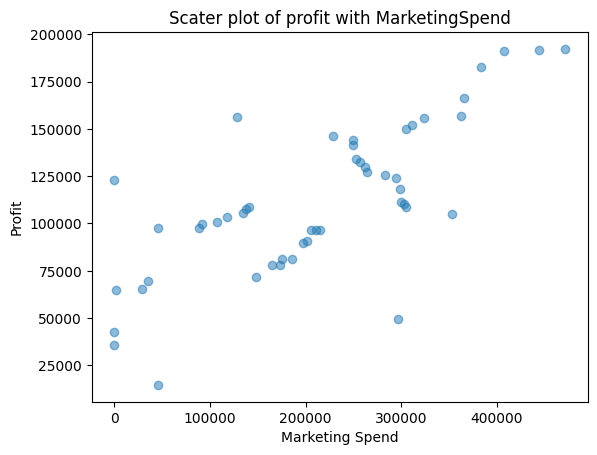

In [ ]:
plt.scatter(data['Marketing Spend'],data['Profit'],alpha=0.5)
plt.title('Scater plot of profit with MarketingSpend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

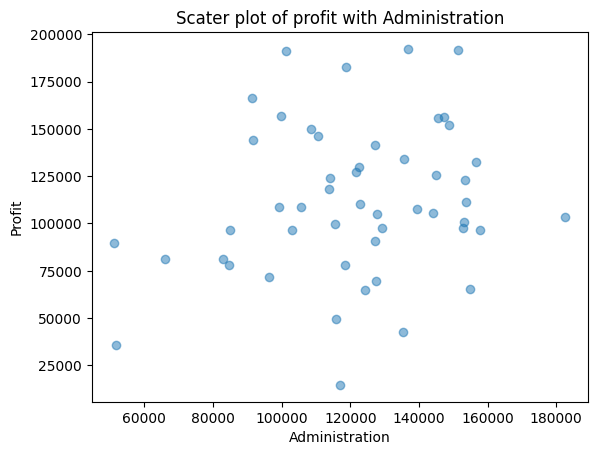

In [ ]:
plt.scatter(data['Administration'],data['Profit'],alpha=0.5)
plt.title('Scater plot of profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

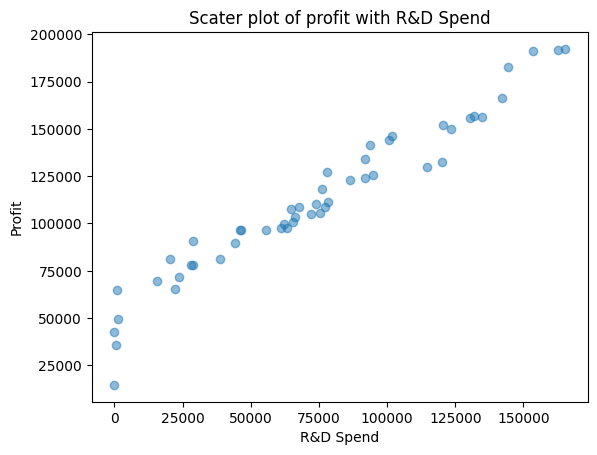

In [ ]:
plt.scatter(data['R&D Spend'],data['Profit'],alpha=0.5)
plt.title('Scater plot of profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

In [ ]:
a = data.groupby(['State'])['Profit']

In [ ]:
data.State.value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [ ]:
data["New York_State"]=np.where(data['State']=='New York',1,0)
data["California_State"]=np.where(data['State']=='California',1,0)
data["Florida_State"]=np.where(data['State']=='Florida',1,0)

In [ ]:
data.drop(columns=['State'],axis=1,inplace=True)

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [ ]:
dependent_variable = "Profit"

In [ ]:
independent_variable = list(set(data.columns.tolist())-{dependent_variable})

In [ ]:
independent_variable

['R&D Spend',
 'Marketing Spend',
 'California_State',
 'Florida_State',
 'New York_State',
 'Administration']

In [ ]:
x = data[independent_variable].values
y = data[dependent_variable].values

In [ ]:
# spliting data into the training set and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [ ]:
x_train.shape

(40, 6)

In [ ]:
x_test.shape

(10, 6)

In [ ]:
y_train.shape

(40,)

In [ ]:
y_test.shape

(10,)

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [ ]:
reg.fit(x,y)

LinearRegression()

In [ ]:
reg.coef_

array([ 8.06023114e-01,  2.69798610e-02, -5.23005912e+01,  1.46488202e+02,
       -9.41876104e+01, -2.70043196e-02])

In [ ]:
reg.intercept_

50177.644422851474

In [ ]:
reg.predict([[155349,471784,1,0,0,130000]])

array([184558.33373812])